In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import *

In [104]:
'''Taken from Prof. Zingale's code'''
def gauss_elim(H, b, quiet=0):
    assert b.ndim == 1, "ERROR: b should be a vector"
    N = len(b)
    # H is square, with each dimension of length N
    assert H.shape == (N, N), "ERROR: H should be square with each dim of same length as b"
    # allocation the solution array
    x = np.zeros((N), dtype=H.dtype)
    # find the scale factors for each row -- this is used when pivoting
    scales = np.max(np.abs(H), 1)
    # keep track of the number of times we swapped rows
    num_row_swap = 0

    # main loop over rows
    for k in range(N):
        # find the pivot row based on the size of column k -- only consider
        # the rows beyond the current row
        row_max = np.argmax(H[k:, k]/scales[k:])
        if k > 0:
            row_max += k  # we sliced H from k:, correct for total rows
        # swap the row with the largest scaled element in the current column
        # with the current row (pivot) -- do this with b too!
        if not row_max == k:
            H[[k, row_max], :] = H[[row_max, k], :]
            b[[k, row_max]] = b[[row_max, k]]
            scales[[k, row_max]] = scales[[row_max, k]]
            num_row_swap += 1

        # do the forward-elimination for all rows below the current
        for i in range(k+1, N):
            coeff = H[i, k] / H[k, k]

            for j in range(k+1, N):
                H[i, j] += -H[k, j] * coeff
            H[i, k] = 0.0
            b[i] += -coeff * b[k]
        
            # check if the row is all zeros -- singular
            if H[i, :].min() == 0 and H[i, :].max() == 0:
                raise ValueError("matrix is singular")
    x[N-1] = b[N-1] / H[N-1, N-1]

    for i in reversed(range(N-1)):
        bsum = b[i]
        for j in range(i+1, N):
            bsum += -H[i, j] * x[j]
        x[i] = bsum / H[i, i]
    return x

In [105]:
''' Solving for vector b given a known matrix H and vector x, H @ x = b'''
n = int(input('Enter the matrix size of the Hilbert matrix: ')) #Enter desired size of Hilbert matrix

#Define the Hilbert Matrix
def hilbert_matrix(n):
    return hilbert(n)
#Define vector x
def vector_x(n):
    return np.arange(n)
#Define vector b
def vector_b(n):
    H = hilbert_matrix(n)
    x = vector_x(n)
    return H @ x

ans = vector_b(n)
print(f'b = {ans}')

b = [99.76406964 96.50927135 93.73586965 91.27745582 89.05094822 87.00659241
 85.11129475 83.34147971 81.67951866 80.11174588 78.62726829 77.21720804
 75.8741976  74.59203027 73.36541059 72.18977129 71.06113613 69.97601492
 68.93132198 67.92431176 66.95252735 66.01375881 65.10600913 64.22746604
 63.37647868 62.55153783 61.75125933 60.97436995 60.21969519 59.48614891
 58.77272425 58.07848575 57.40256252 56.74414214 56.10246541 55.47682157
 54.86654415 54.27100728 53.6896223  53.12183484 52.56712209 52.02499042
 51.49497319 50.97662875 50.46953871 49.97330624 49.48755462 49.01192588
 48.54607956 48.08969158 47.64245315 47.20406988 46.77426084 46.35275776
 45.93930428 45.53365527 45.13557613 44.74484225 44.36123841 43.98455828
 43.61460395 43.25118545 42.89412035 42.54323337 42.19835601 41.85932619
 41.52598797 41.19819119 40.87579125 40.55864879 40.24662949 39.93960378
 39.63744668 39.34003753 39.04725984 38.75900108 38.47515252 38.19560905
 37.92026902 37.64903412 37.38180921 37.1185022

In [106]:
'''Solving for vector x given the known vector b and matrix H from above, H^-1 b = x'''
def sys_sol(n):
    H = hilbert(n)
    b = vector_b(n)
    return gauss_elim(H.copy(), b.copy())

print(f'x = {sys_sol(n)}')

x = [ 7.82724392e-06  9.97188469e-01  2.16708142e+00 -7.06879726e-01
  4.43351620e+01 -2.36084905e+02  8.14624634e+02 -1.35052338e+03
  3.08792697e+02  2.59026192e+03 -2.97374811e+03 -1.25287041e+03
  3.56957276e+03 -9.41922475e+02 -6.16710995e+02 -1.12799576e+02
  2.13580058e+03 -1.90475818e+03 -2.85463445e+03  1.14243597e+03
  2.64201612e+03  7.31959739e+02  6.08722948e+01  1.67903651e+03
 -2.19717814e+03 -4.14736411e+03  2.01314505e+03 -4.47790424e+02
 -3.46032308e+03  5.88722505e+03  2.09260017e+03 -1.15175620e+03
  1.44730077e+03 -4.59048388e+02 -4.53581856e+03  4.32472614e+03
 -1.56520444e+03 -1.42921083e+03 -1.66374476e+03  1.94576100e+03
 -2.68800071e+02 -1.97291436e+02 -3.59653330e+03  9.79789466e+02
  1.94306583e+03  5.20878327e+03  3.43563331e+03 -6.87426442e+03
  4.41947611e+03  3.67248993e+03 -7.31309943e+02 -8.76716435e+03
 -1.80633064e+03  1.59451425e+02  1.43022595e+03  3.89956991e+03
 -3.97338815e+03 -1.85327526e+03  3.94999852e+03 -4.28811242e+03
 -1.15906355e+03  3.1

In [107]:
#Finding error propagation
for k in range(2,16):
    error = np.max(np.abs(sys_sol(k) - vector_x(k)))
    print(f'N = {k}: error = {error}')

N = 2: error = 0.0
N = 3: error = 2.220446049250313e-16
N = 4: error = 6.707967514785196e-13
N = 5: error = 2.589040093425865e-12
N = 6: error = 8.535518958296962e-10
N = 7: error = 8.078174573711294e-09
N = 8: error = 1.9450337074289337e-07
N = 9: error = 4.011823577876328e-05
N = 10: error = 0.0029059922620078282
N = 11: error = 0.009961925189480247
N = 12: error = 1.7383413354416284
N = 13: error = 32.39530980948649
N = 14: error = 47.536035778680706
N = 15: error = 32.544442675729286


The error becomes $\mathcal{O}(1)$ at $N = 12$

In [108]:
data = np.loadtxt('signal.txt')
x = data[:, 0]
f_original = data[:,1]
f_noisy = data[:, 2]
sigma = float(input('Enter desired Gaussian width: ')) #Please only enter integer values

def gaussian(n): #original kernel function
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * n**2 * sigma**2)

freq = np.fft.fftfreq(len(x), d= x[1]-x[0]) #Return the FFT sample frequencies

kernel = gaussian(freq)
kernel = kernel / np.sum(kernel)

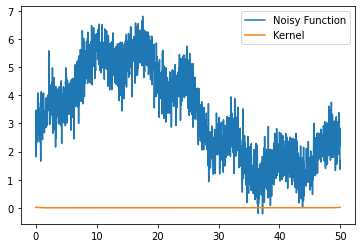

In [109]:
#Plot the noisy function along with the kernel vs. x
plt.plot(x, f_noisy, label='Noisy Function')
plt.plot(x, kernel, label='Kernel')
plt.legend()

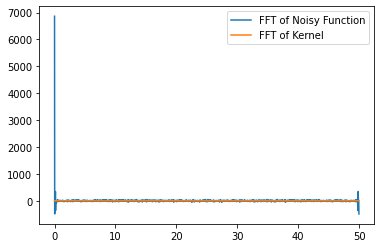

In [110]:
#Plot FFT of noisy function along with FFT of kernel vs. x
fourier_noisy= (np.fft.fft(f_noisy))
fourier_kernel = (np.fft.fft(kernel))
plt.plot(x, np.real(fourier_noisy), label = 'FFT of Noisy Function')
plt.plot(x, np.real(fourier_kernel), label = 'FFT of Kernel')
plt.legend()

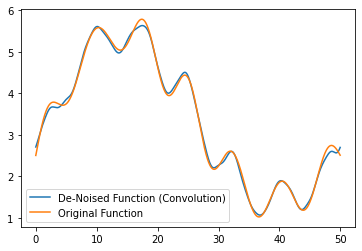

In [111]:
#Find the convolution (called de-noised) and plot convolution along with original function vs. x
fourier_multi= fourier_kernel * fourier_noisy
convolution = np.real((np.fft.ifft(fourier_multi))) # inverse FFT
plt.plot(x, convolution, label = 'De-Noised Function (Convolution)')
plt.plot(x, f_original, label = 'Original Function')
plt.legend()